In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
methods = ["Transpose", "Pseudoinverse", "DLS"]
trials = [10, 20, 30, 40, 50]

# Trial by Method, recorded from previous runs
iterations = np.array([[ 601,  236,  242,],
 [ 932,  218,  273.],
 [1165,  304,  300.],
 [1399,  320,  323.],
 [1560,  347,  347.]])

avg_errors = np.array([[0.0075453,  0.0185824,  0.01659668],
 [0.00668652, 0.08620312, 0.01676381],
 [0.00632133, 0.02107487, 0.01758885],
 [0.00659449, 0.0227557,  0.01676777],
 [0.00634295, 0.06644525, 0.01515416]])

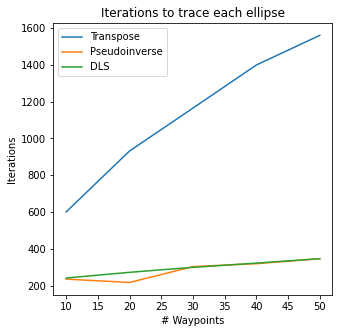

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, iterations[:, 0], label="Transpose")
ax.plot(trials, iterations[:, 1], label="Pseudoinverse")
ax.plot(trials, iterations[:, 2], label="DLS")

ax.set_title("Iterations to trace each ellipse")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Iterations")

plt.legend()
plt.show()

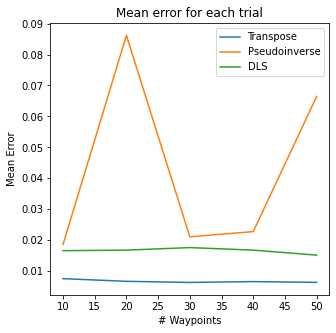

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(trials, avg_errors[:, 0], label="Transpose")
ax.plot(trials, avg_errors[:, 1], label="Pseudoinverse")
ax.plot(trials, avg_errors[:, 2], label="DLS")

ax.set_title("Mean error for each trial")
ax.set_xlabel("# Waypoints")
ax.set_ylabel("Mean Error")

plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Webots import *

c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1240: RuntimeWarning: divide by zero encountered in true_divide
  skw = (R - R.T) / 2 / math.sin(theta)
c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1240: RuntimeWarning: invalid value encountered in true_divide
  skw = (R - R.T) / 2 / math.sin(theta)
c:\Python39\lib\site-packages\spatialmath\base\transforms3d.py:1244: RuntimeWarning: invalid value encountered in multiply
  return skw * theta


In [67]:
plt.rc('font', **{'family': 'Times New Roman'})
plt.rc('text', usetex=True)

In [14]:
# number of different runs
print(len(end_effector_positions))
# number of intermediate positions
print(len(end_effector_positions[0]))
# number of coordinates (x, y, z
print(len(end_effector_positions[0][0]))
# waypoints
print(len(waypoints))

3
1207
3
30


In [15]:
transpose_positions = end_effector_positions[0]
pesudoinverse_positions = end_effector_positions[1]
dls_positions = end_effector_positions[2]

In [16]:
def create_ellipse_plot(positions, waypoints, ax=None, name=None):
    display = False
    if ax==None:
        display = True
        fig, ax = plt.subplots(1, 1)
    ax.scatter(positions[:, 1], positions[:, 2], c="0.3", marker=".", s=5, label="End Effector Positions")
    ax.scatter(waypoints[:, 1], waypoints[:, 2], c="k", marker="+", label="Waypoints")
    ax.set_xlabel("$y$ $(m)$")
    ax.set_ylabel("$z$ $(m)$")
    # plt.legend()
    if display:
        ax.set_title("The $(y, z)$ position of the end effector while tracing waypoints on an ellipse")
        plt.show()
    else:
        ax.set_title(name)

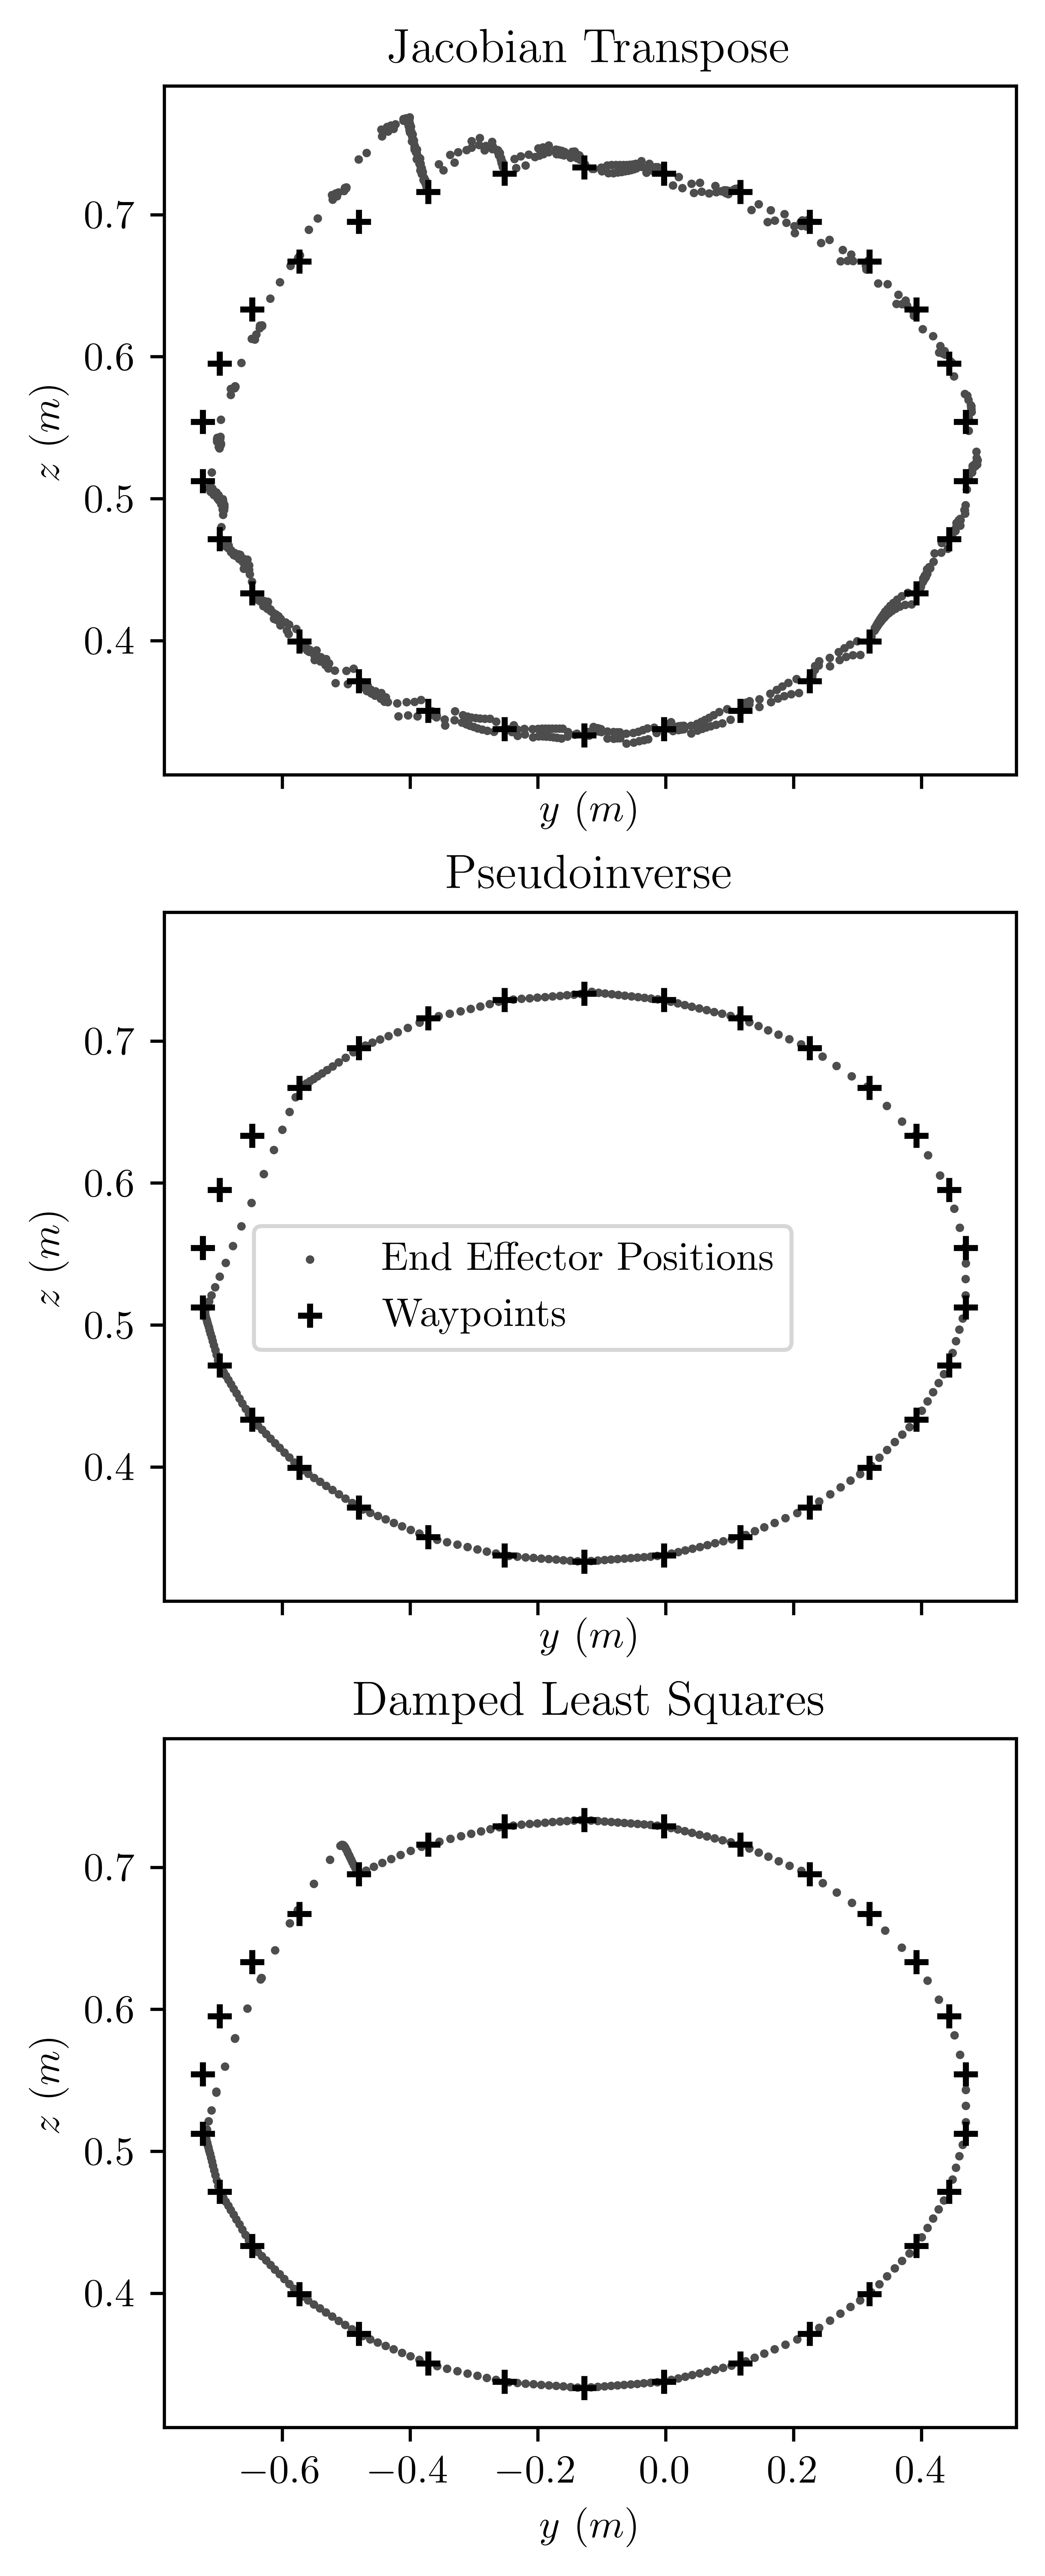

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.5, 8.8), sharex="col", sharey="col")
fig.set_constrained_layout(True)
fig.set_dpi(1200)
plt.title("The $(y, z)$ position of the end effector while tracing waypoints on an ellipse using each method")

create_ellipse_plot(np.array(transpose_positions), waypoints, ax1, name="Jacobian Transpose")
create_ellipse_plot(np.array(pesudoinverse_positions), waypoints, ax2, name="Pseudoinverse")
create_ellipse_plot(np.array(dls_positions), waypoints, ax3, name="Damped Least Squares")

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, loc="center")
fig.savefig("ellipse_waypoints.pdf")
plt.show()

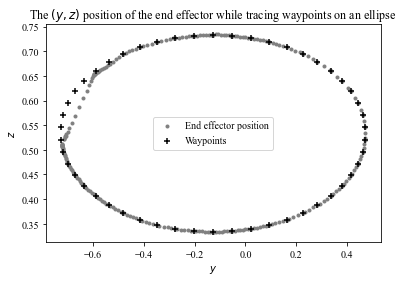

In [120]:
create_ellipse_plot(np.array(pesudoinverse_positions), waypoints)

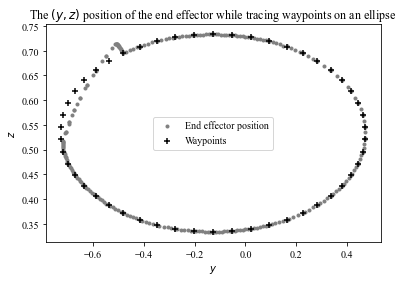

In [121]:
create_ellipse_plot(np.array(dls_positions), waypoints)

In [9]:
# To run the manipulator
i = 0
while robot.step(timestep) != -1:
    position = positions[i]
    [motor.setPosition(angle) for motor, angle in zip(joint_motors, position)]

    i += 1
    if i == len(positions):
        break


In [6]:
print(np.array(desired_twists[0]).shape)

(1558, 6)


In [29]:
desired = np.array(desired_twists[1])
actual = np.array(actual_twists[1])

norm_desired = desired / np.linalg.norm(desired, axis=1)[:, np.newaxis]
# normalization is correct
# plt.plot(np.linalg.norm(norm_desired, axis=1))
norm_actual = actual / np.linalg.norm(actual, axis=1)[:, np.newaxis]
# plt.plot(np.linalg.norm(norm_actual, axis=1))

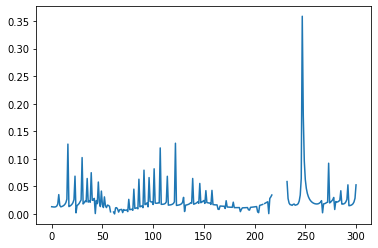

In [30]:
plt.plot(np.linalg.norm(norm_desired - norm_actual, axis=1))

In [63]:
def create_error_plot(actual, desired, ax=None, title=None):
    # seconds
    timestep = 32 / 1000
    norm_desired = desired / np.linalg.norm(desired, axis=1)[:, np.newaxis]
    # normalization is correct
    # plt.plot(np.linalg.norm(norm_desired, axis=1))
    norm_actual = actual / np.linalg.norm(actual, axis=1)[:, np.newaxis]
    # plt.plot(np.linalg.norm(norm_actual, axis=1))
    cos_similarity = [np.dot(d, a) for d, a in zip(norm_desired, norm_actual)]

    display = False    
    if ax is None:
        display = True
        fig, ax = plt.subplots(1, 1)
    ax.set_xlabel("Time ($s$)")
    ax.set_ylabel("Cosine Similarity")
    ax.plot(np.linspace(0, timestep * desired.shape[0], num=desired.shape[0]), cos_similarity, color='0.1')
    
    if display:
        plt.show()
    if title != None:
        ax.set_title(title)

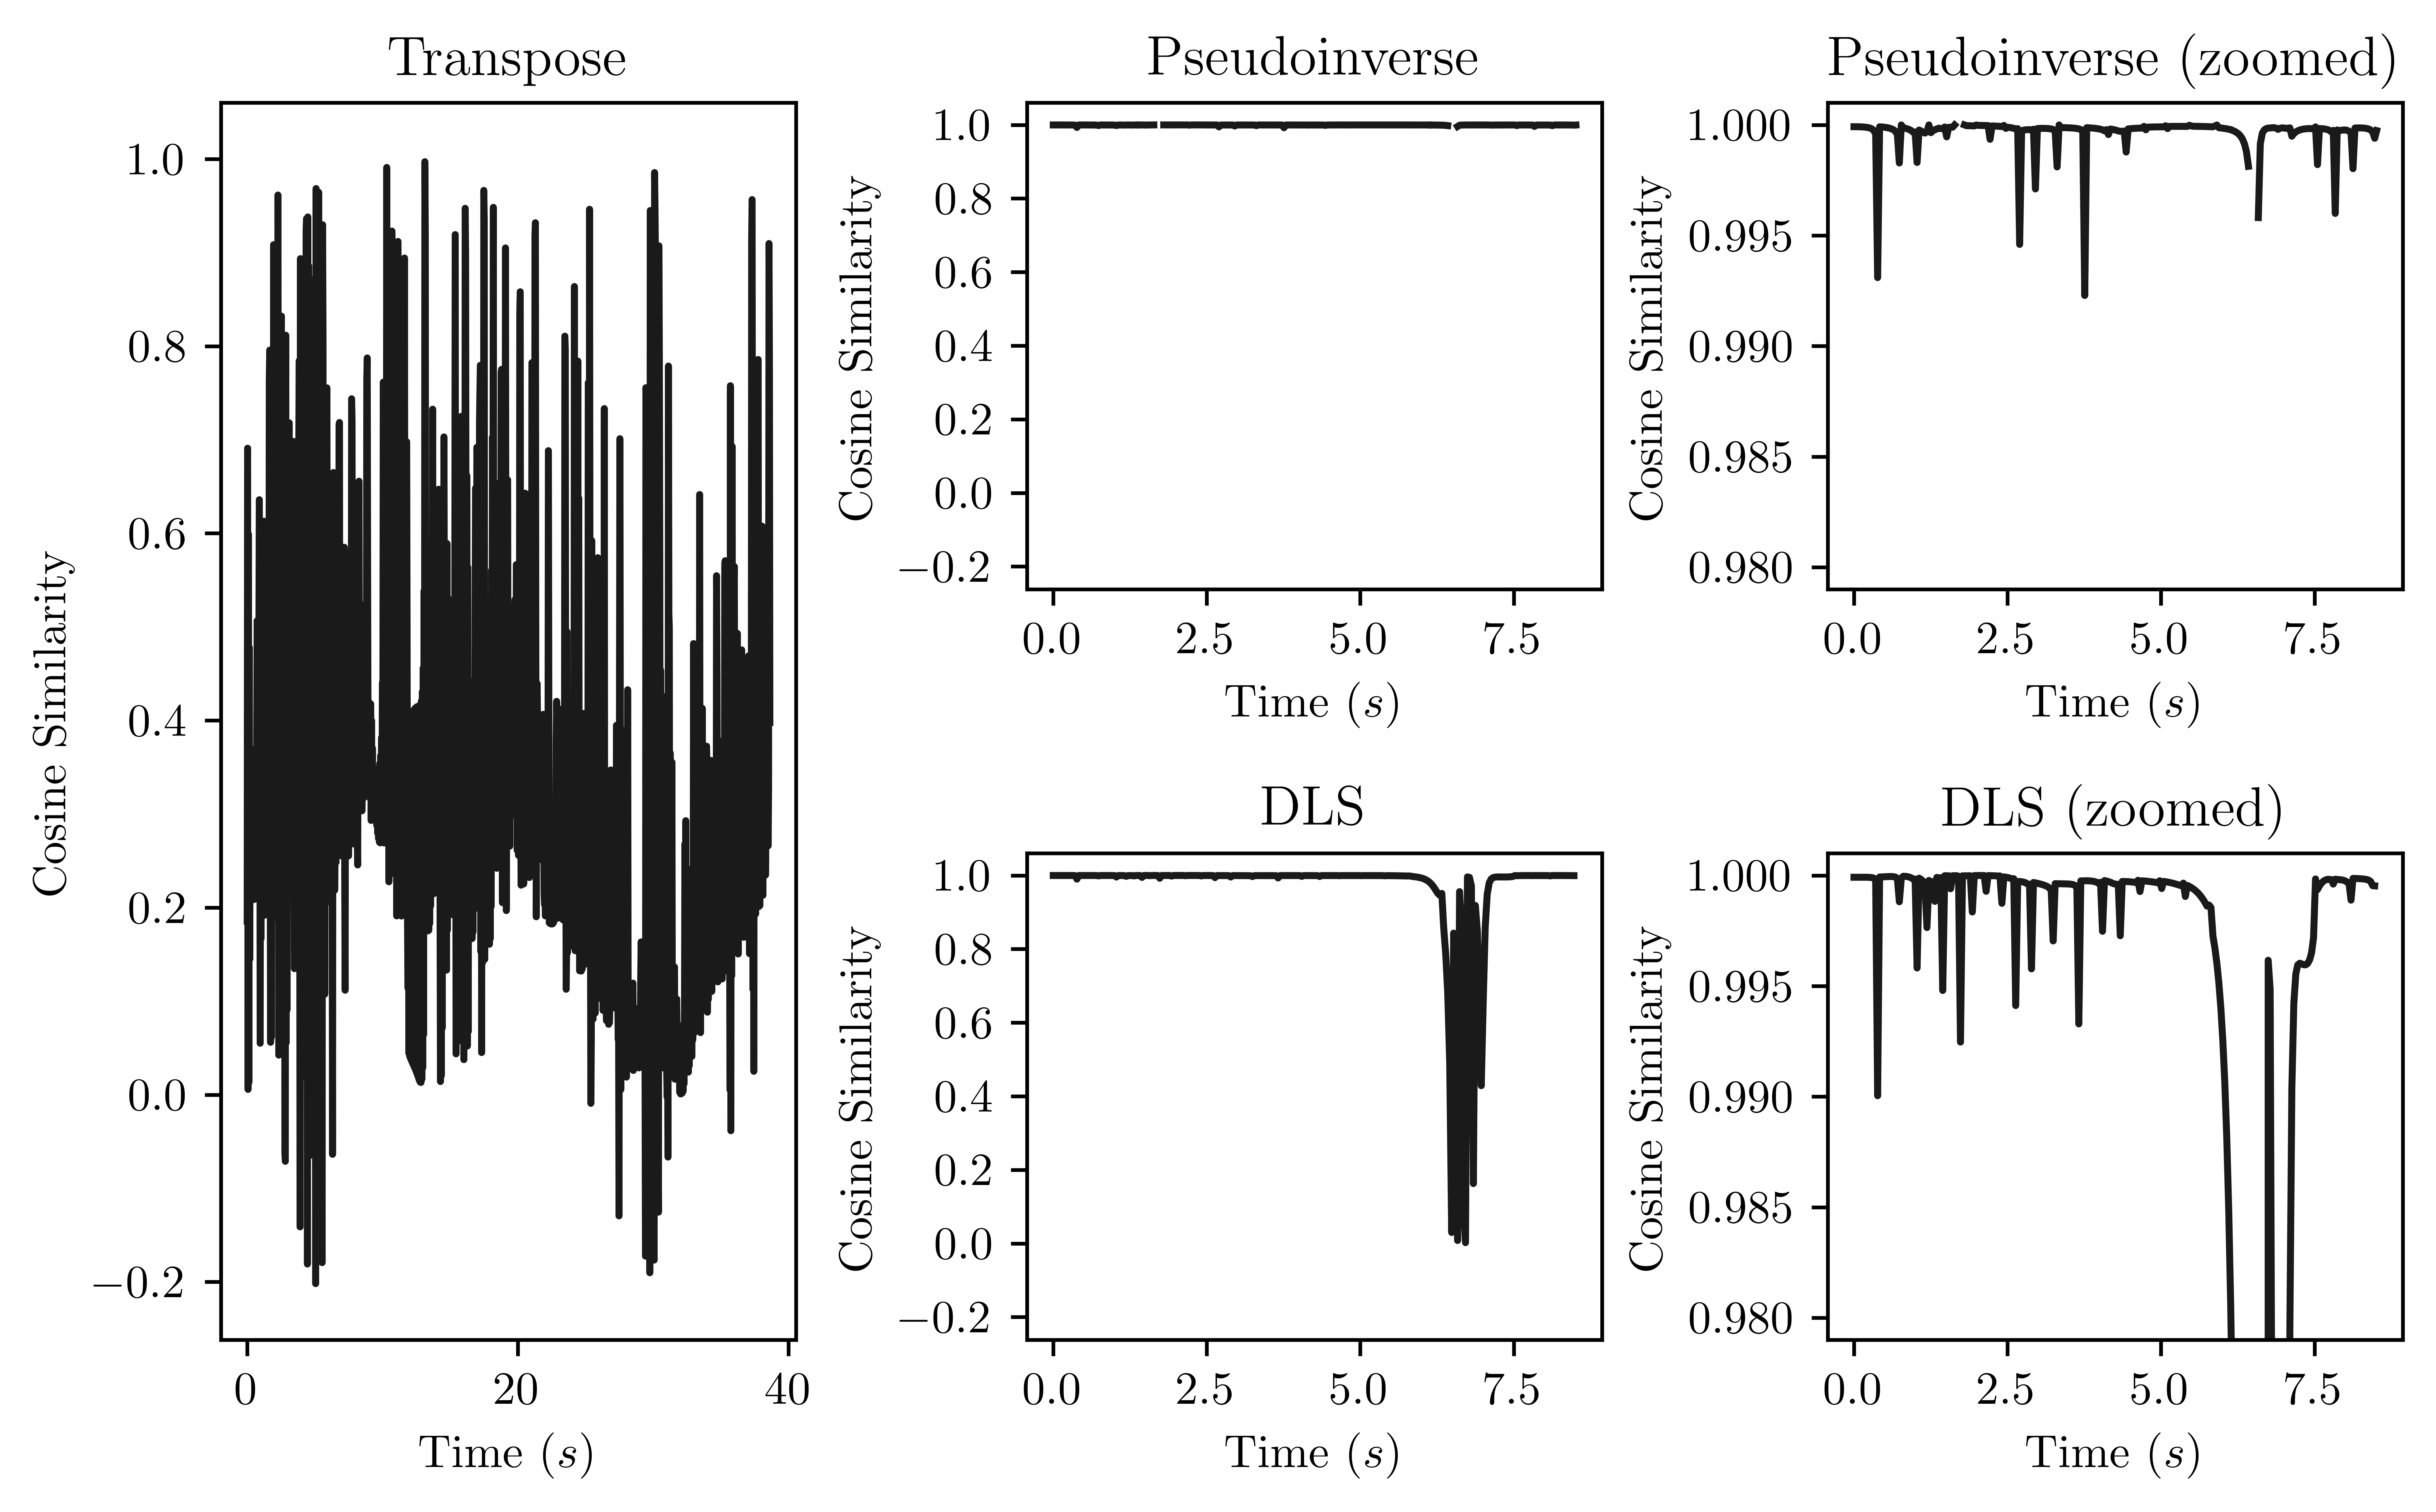

In [72]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(3.5, 8.8), sharey="col")
mainfig = plt.figure(figsize=(7.16, 4.4))
mainfig.set_constrained_layout(True)
gs = mainfig.add_gridspec(2, 3)
ax1 = mainfig.add_subplot(gs[:, 0])
ax2 = mainfig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = mainfig.add_subplot(gs[1, 1], sharey=ax1, sharex=ax2)
ax4 = mainfig.add_subplot(gs[0, 2])
ax5 = mainfig.add_subplot(gs[1, 2], sharey=ax4, sharex=ax4)


# mainfig.add_axes(axes["a"])

mainfig.set_dpi(1200)

create_error_plot(np.array(desired_twists[0]), np.array(actual_twists[0]), ax1, "Transpose")
create_error_plot(np.array(desired_twists[1]), np.array(actual_twists[1]), ax2, "Pseudoinverse")
create_error_plot(np.array(desired_twists[2]), np.array(actual_twists[2]), ax3, "DLS")
create_error_plot(np.array(desired_twists[1]), np.array(actual_twists[1]), ax4, "Pseudoinverse (zoomed)")
create_error_plot(np.array(desired_twists[2]), np.array(actual_twists[2]), ax5, "DLS (zoomed)")

ax4.set_ylim(0.979, 1.001)

# handles, labels = ax3.get_legend_handles_labels()
# fig.legend(handles, labels, loc="center")
mainfig.savefig("cosine_similarity.pdf")
plt.show()

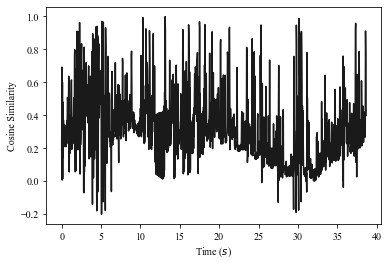

In [32]:
create_error_plot(np.array(desired_twists[0]), np.array(actual_twists[0]))

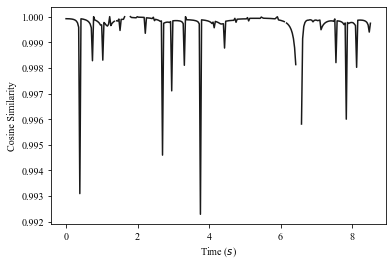

In [33]:
create_error_plot(np.array(desired_twists[1]), np.array(actual_twists[1]))

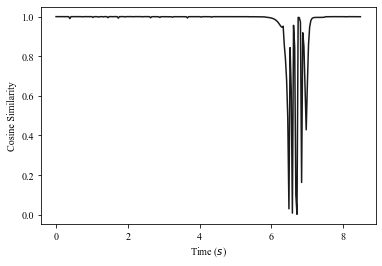

In [34]:
create_error_plot(np.array(desired_twists[2]), np.array(actual_twists[2]))